# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.to_csv('../data/raw/DataFrameOriginal.csv',index=False)

In [4]:
df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Revisión de ceros en la glucose, dado que representan menos del 1% del DF (5 valores, los eliminaré)
conteo_ceros = (df['Glucose'] == 0).sum()
print("Número de ceros:", conteo_ceros)


Número de ceros: 5


In [8]:
df2 = df[df['Glucose'] != 0]
df2.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
conteo_ceros = (df2['BloodPressure'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 35


In [10]:
#Imputaré los 35 ceros con la mediana ya que la distribución tiende a ser regular y no es muy afectada por valores atípicos.

mediana_presion = df2['BloodPressure'].replace(0, np.nan).median()
df2['BloodPressure'] = df2['BloodPressure'].replace(0, mediana_presion)
df2.describe()


/tmp/ipykernel_3119/707722096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BloodPressure'] = df2['BloodPressure'].replace(0, mediana_presion)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
conteo_ceros = (df2['BMI'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 11


In [12]:
mediana_bmi = df2['BMI'].replace(0, np.nan).median()
df2['BMI'] = df2['BMI'].replace(0, mediana_bmi)
df2.describe()

/tmp/ipykernel_3119/1896497026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BMI'] = df2['BMI'].replace(0, mediana_bmi)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,20.477064,80.292267,32.452425,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,15.973171,115.457448,6.878757,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/tmp/ipykernel_3119/1673058912.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Pregnancies.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_3119/1673058912.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Glucose.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
/tmp/ipykernel_3119/1673058912.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Insulin.set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
/tmp/ipykernel_3119/1673058912.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_age.set_xticklabels(axis[2,1].get_xticklabels(), rotation=90)


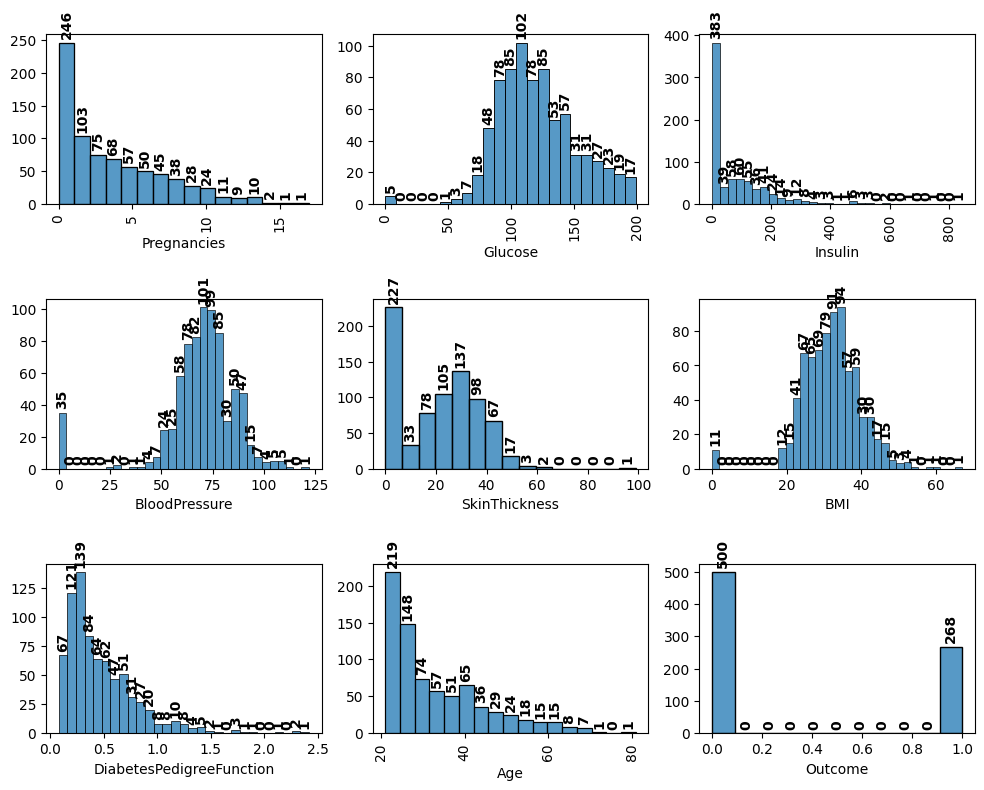

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (10, 8))

Gráfico_Pregnancies = sns.histplot(ax=axis[0,0],data=df, x='Pregnancies')
Gráfico_Pregnancies.set_ylabel('')
Gráfico_Pregnancies.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
for p in Gráfico_Pregnancies.patches:
    Gráfico_Pregnancies.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Glucose= sns.histplot(ax=axis[0,1],data=df, x='Glucose')
Gráfico_Glucose.set_ylabel('')
Gráfico_Glucose.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
for p in Gráfico_Glucose.patches:
    Gráfico_Glucose.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_Insulin= sns.histplot(ax=axis[0,2],data=df, x='Insulin')
Gráfico_Insulin.set_ylabel('')
Gráfico_Insulin.set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
for p in Gráfico_Insulin.patches:
    Gráfico_Insulin.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_BloodPressure=sns.histplot(ax=axis[1,0],data=df, x='BloodPressure')
Gráfico_BloodPressure.set_ylabel('')
for p in Gráfico_BloodPressure.patches:
    Gráfico_BloodPressure.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_SkinThickness=sns.histplot(ax=axis[1,1],data=df, x='SkinThickness')
Gráfico_SkinThickness.set_ylabel('')
for p in Gráfico_SkinThickness.patches:
    Gráfico_SkinThickness.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_BMI=sns.histplot(ax=axis[1,2],data=df, x='BMI')
Gráfico_BMI.set_ylabel('')
for p in Gráfico_BMI.patches:
    Gráfico_BMI.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_DiabetesPedigreeFunction=sns.histplot(ax=axis[2,0],data=df, x='DiabetesPedigreeFunction')
Gráfico_DiabetesPedigreeFunction.set_ylabel('')
for p in Gráfico_DiabetesPedigreeFunction.patches:
    Gráfico_DiabetesPedigreeFunction.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_age=sns.histplot(ax=axis[2,1],data=df, x='Age')
Gráfico_age.set_ylabel('')
Gráfico_age.set_xticklabels(axis[2,1].get_xticklabels(), rotation=90)
for p in Gráfico_age.patches:
    Gráfico_age.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Outcome=sns.histplot(ax=axis[2,2],data=df, x='Outcome')
Gráfico_Outcome.set_ylabel('')
for p in Gráfico_Outcome.patches:
    Gráfico_Outcome.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

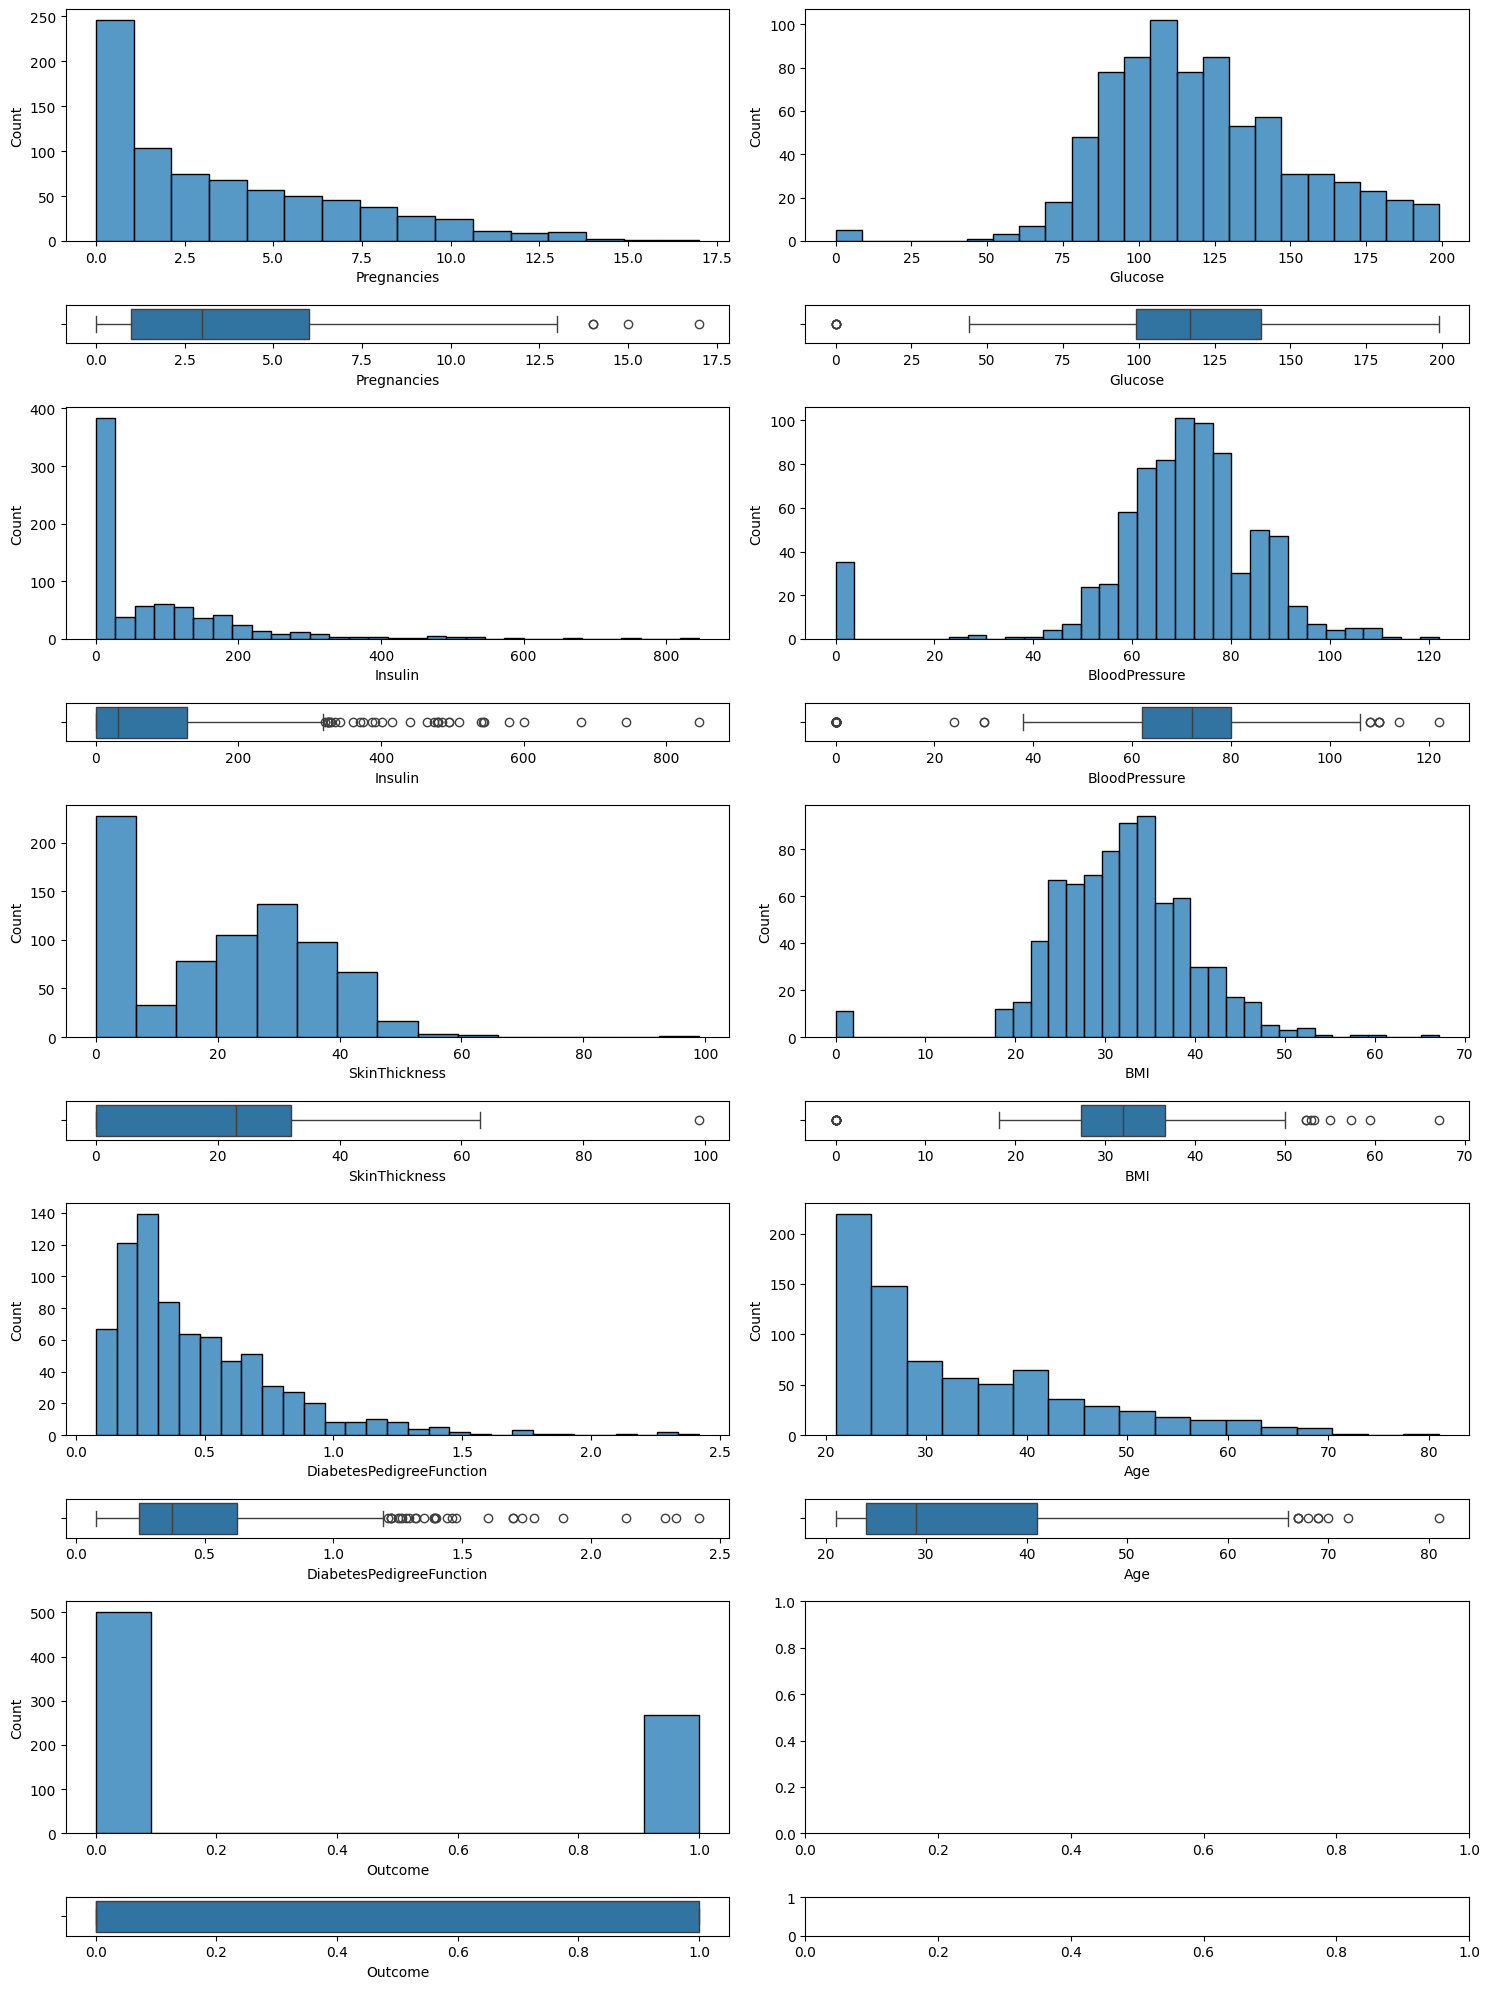

In [14]:
fig, axis = plt.subplots(10, 2, figsize = (15, 20), gridspec_kw={'height_ratios': [6, 1,6,1,6, 1,6,1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='Pregnancies')
sns.boxplot(ax=axis[1,0],data=df,x='Pregnancies')

sns.histplot(ax=axis[0,1],data=df,x='Glucose')
sns.boxplot(ax=axis[1,1],data=df,x='Glucose')

sns.histplot(ax=axis[2,0],data=df,x='Insulin')
sns.boxplot(ax=axis[3,0],data=df,x='Insulin')

sns.histplot(ax=axis[2,1],data=df,x='BloodPressure')
sns.boxplot(ax=axis[3,1],data=df,x='BloodPressure')

sns.histplot(ax=axis[4,0],data=df,x='SkinThickness')
sns.boxplot(ax=axis[5,0],data=df,x='SkinThickness')

sns.histplot(ax=axis[4,1],data=df,x='BMI')
sns.boxplot(ax=axis[5,1],data=df,x='BMI')

sns.histplot(ax=axis[6,0],data=df,x='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[7,0],data=df,x='DiabetesPedigreeFunction')

sns.histplot(ax=axis[6,1],data=df,x='Age')
sns.boxplot(ax=axis[7,1],data=df,x='Age')

sns.histplot(ax=axis[8,0],data=df,x='Outcome')
sns.boxplot(ax=axis[9,0],data=df,x='Outcome')

plt.tight_layout()
plt.show()

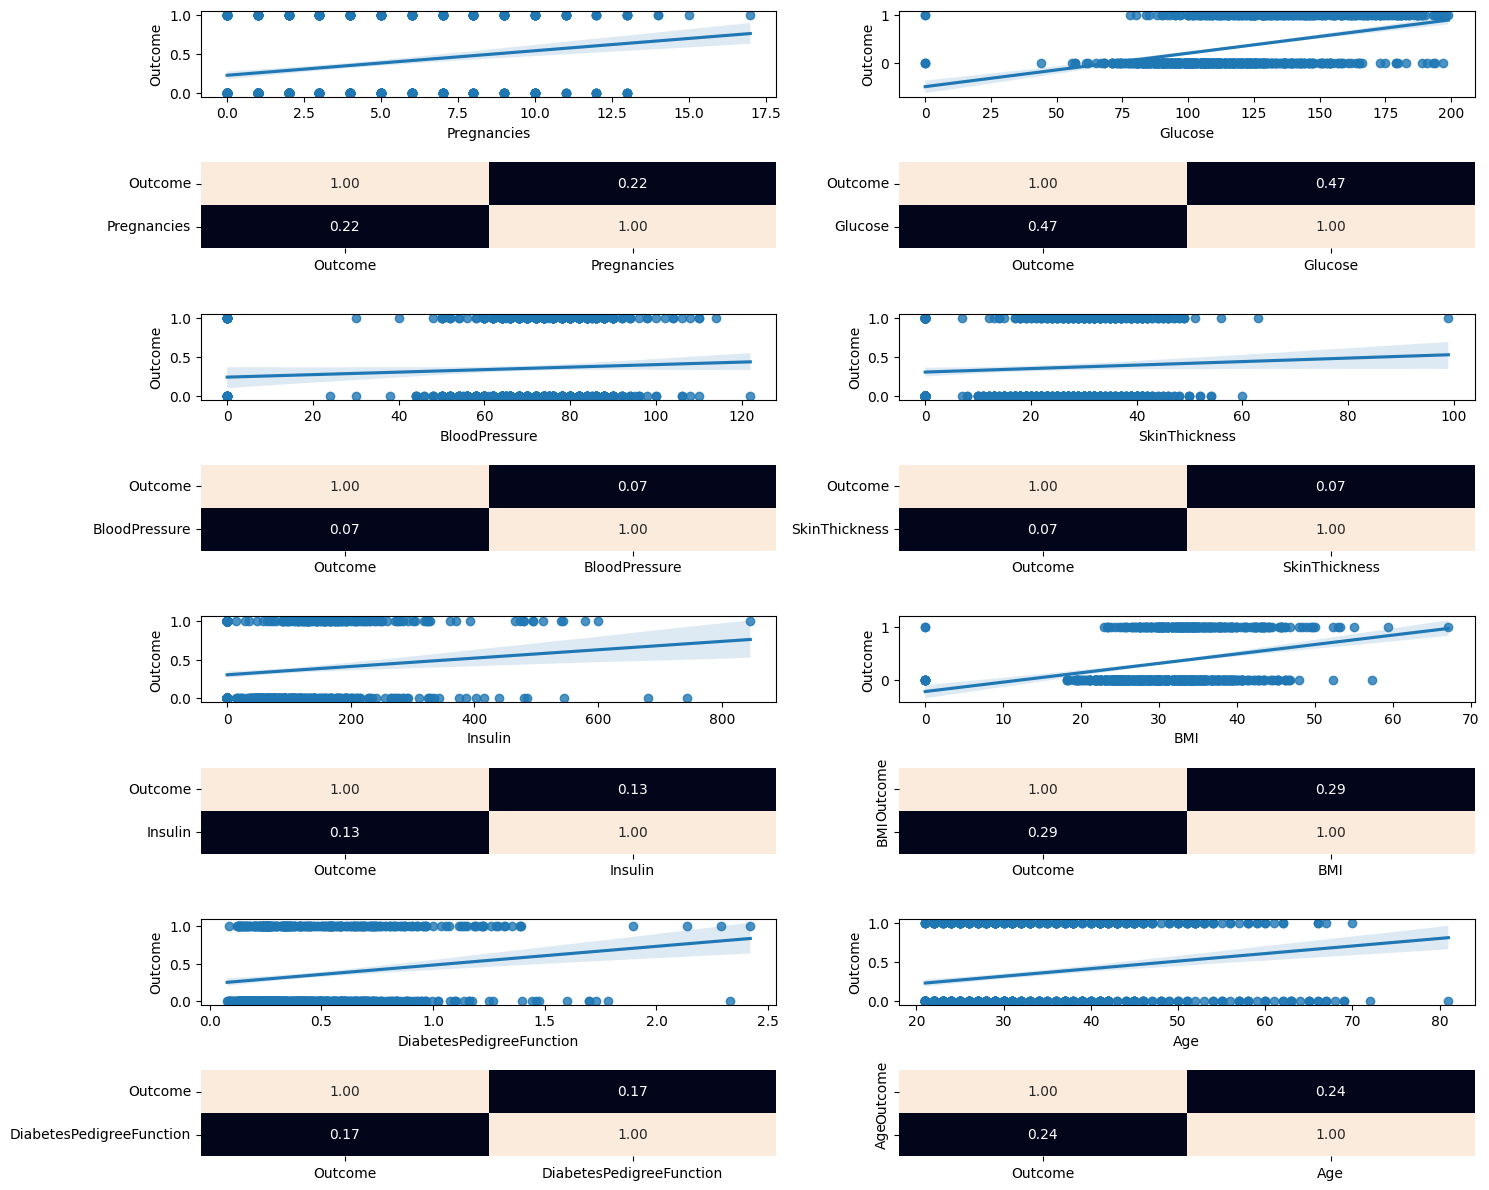

In [15]:
fig, axis = plt.subplots(8, 2, figsize = (15,12))

sns.regplot(ax = axis[0,0], data=df,x='Pregnancies', y='Outcome')
sns.heatmap(df[['Outcome','Pregnancies']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df,x='Glucose', y='Outcome')
sns.heatmap(df[['Outcome','Glucose']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df,x='BloodPressure', y='Outcome')
sns.heatmap(df[['Outcome','BloodPressure']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax = axis[2,1], data=df,x='SkinThickness', y='Outcome')
sns.heatmap(df[['Outcome','SkinThickness']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

sns.regplot(ax = axis[4,0], data=df,x='Insulin', y='Outcome')
sns.heatmap(df[['Outcome','Insulin']].corr(),annot=True,fmt='.2f',ax=axis[5,0],cbar=False)

sns.regplot(ax = axis[4,1], data=df,x='BMI', y='Outcome')
sns.heatmap(df[['Outcome','BMI']].corr(),annot=True,fmt='.2f',ax=axis[5,1],cbar=False)

sns.regplot(ax = axis[6,0], data=df,x='DiabetesPedigreeFunction', y='Outcome')
sns.heatmap(df[['Outcome','DiabetesPedigreeFunction']].corr(),annot=True,fmt='.2f',ax=axis[7,0],cbar=False)

sns.regplot(ax = axis[6,1], data=df,x='Age', y='Outcome')
sns.heatmap(df[['Outcome','Age']].corr(),annot=True,fmt='.2f',ax=axis[7,1],cbar=False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3119/167187955.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Age_Outcome.set_xticklabels(Gráfico_Age_Outcome.get_xticklabels(), rotation=90)


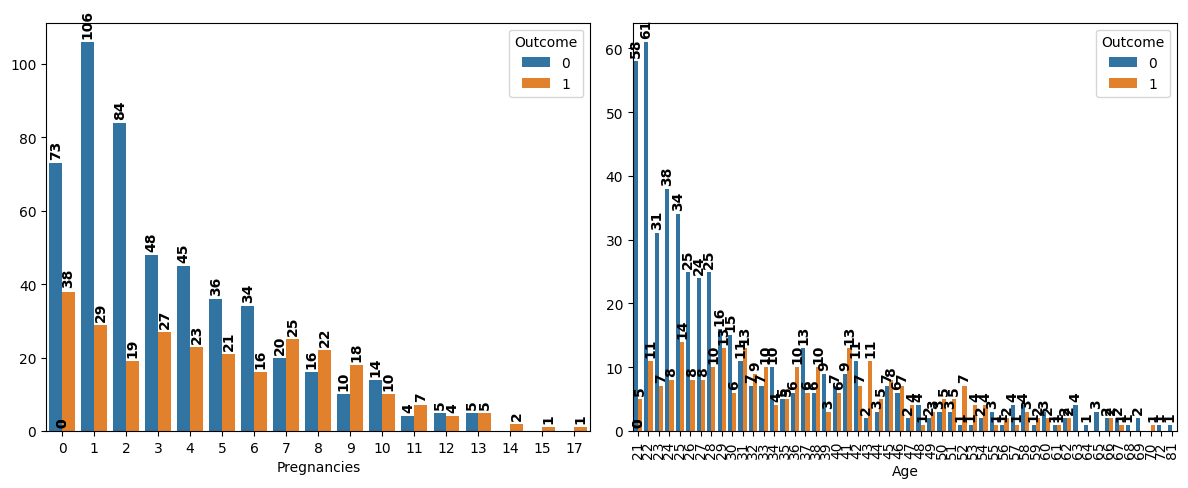

In [16]:
#análisis categórico - categórico

fig, axis = plt.subplots(1, 2, figsize = (12,5))

Gráfico_Pregnancies_Outcome = sns.countplot(data=df, x='Pregnancies',hue='Outcome',ax=axis[0])
Gráfico_Pregnancies_Outcome.set_ylabel('')
for p in Gráfico_Pregnancies_Outcome.patches:
    Gráfico_Pregnancies_Outcome.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Age_Outcome = sns.countplot(data=df, x='Age',hue='Outcome',ax=axis[1])
Gráfico_Age_Outcome.set_ylabel('')
Gráfico_Age_Outcome.set_xticklabels(Gráfico_Age_Outcome.get_xticklabels(), rotation=90)
for p in Gráfico_Age_Outcome.patches:
    Gráfico_Age_Outcome.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

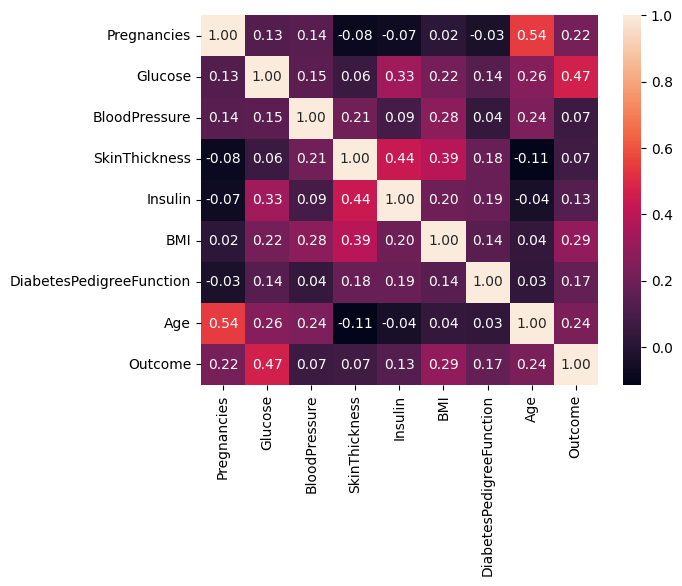

In [17]:
#Se evidencia que hay una relación directamente proporcional entre Diabetes y embarazos, diabetes y Edad.

#Veamos el heatmap

columnas_correlacion =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

sns.heatmap(df[columnas_correlacion].corr(),annot=True,fmt='.2f')
plt.show()


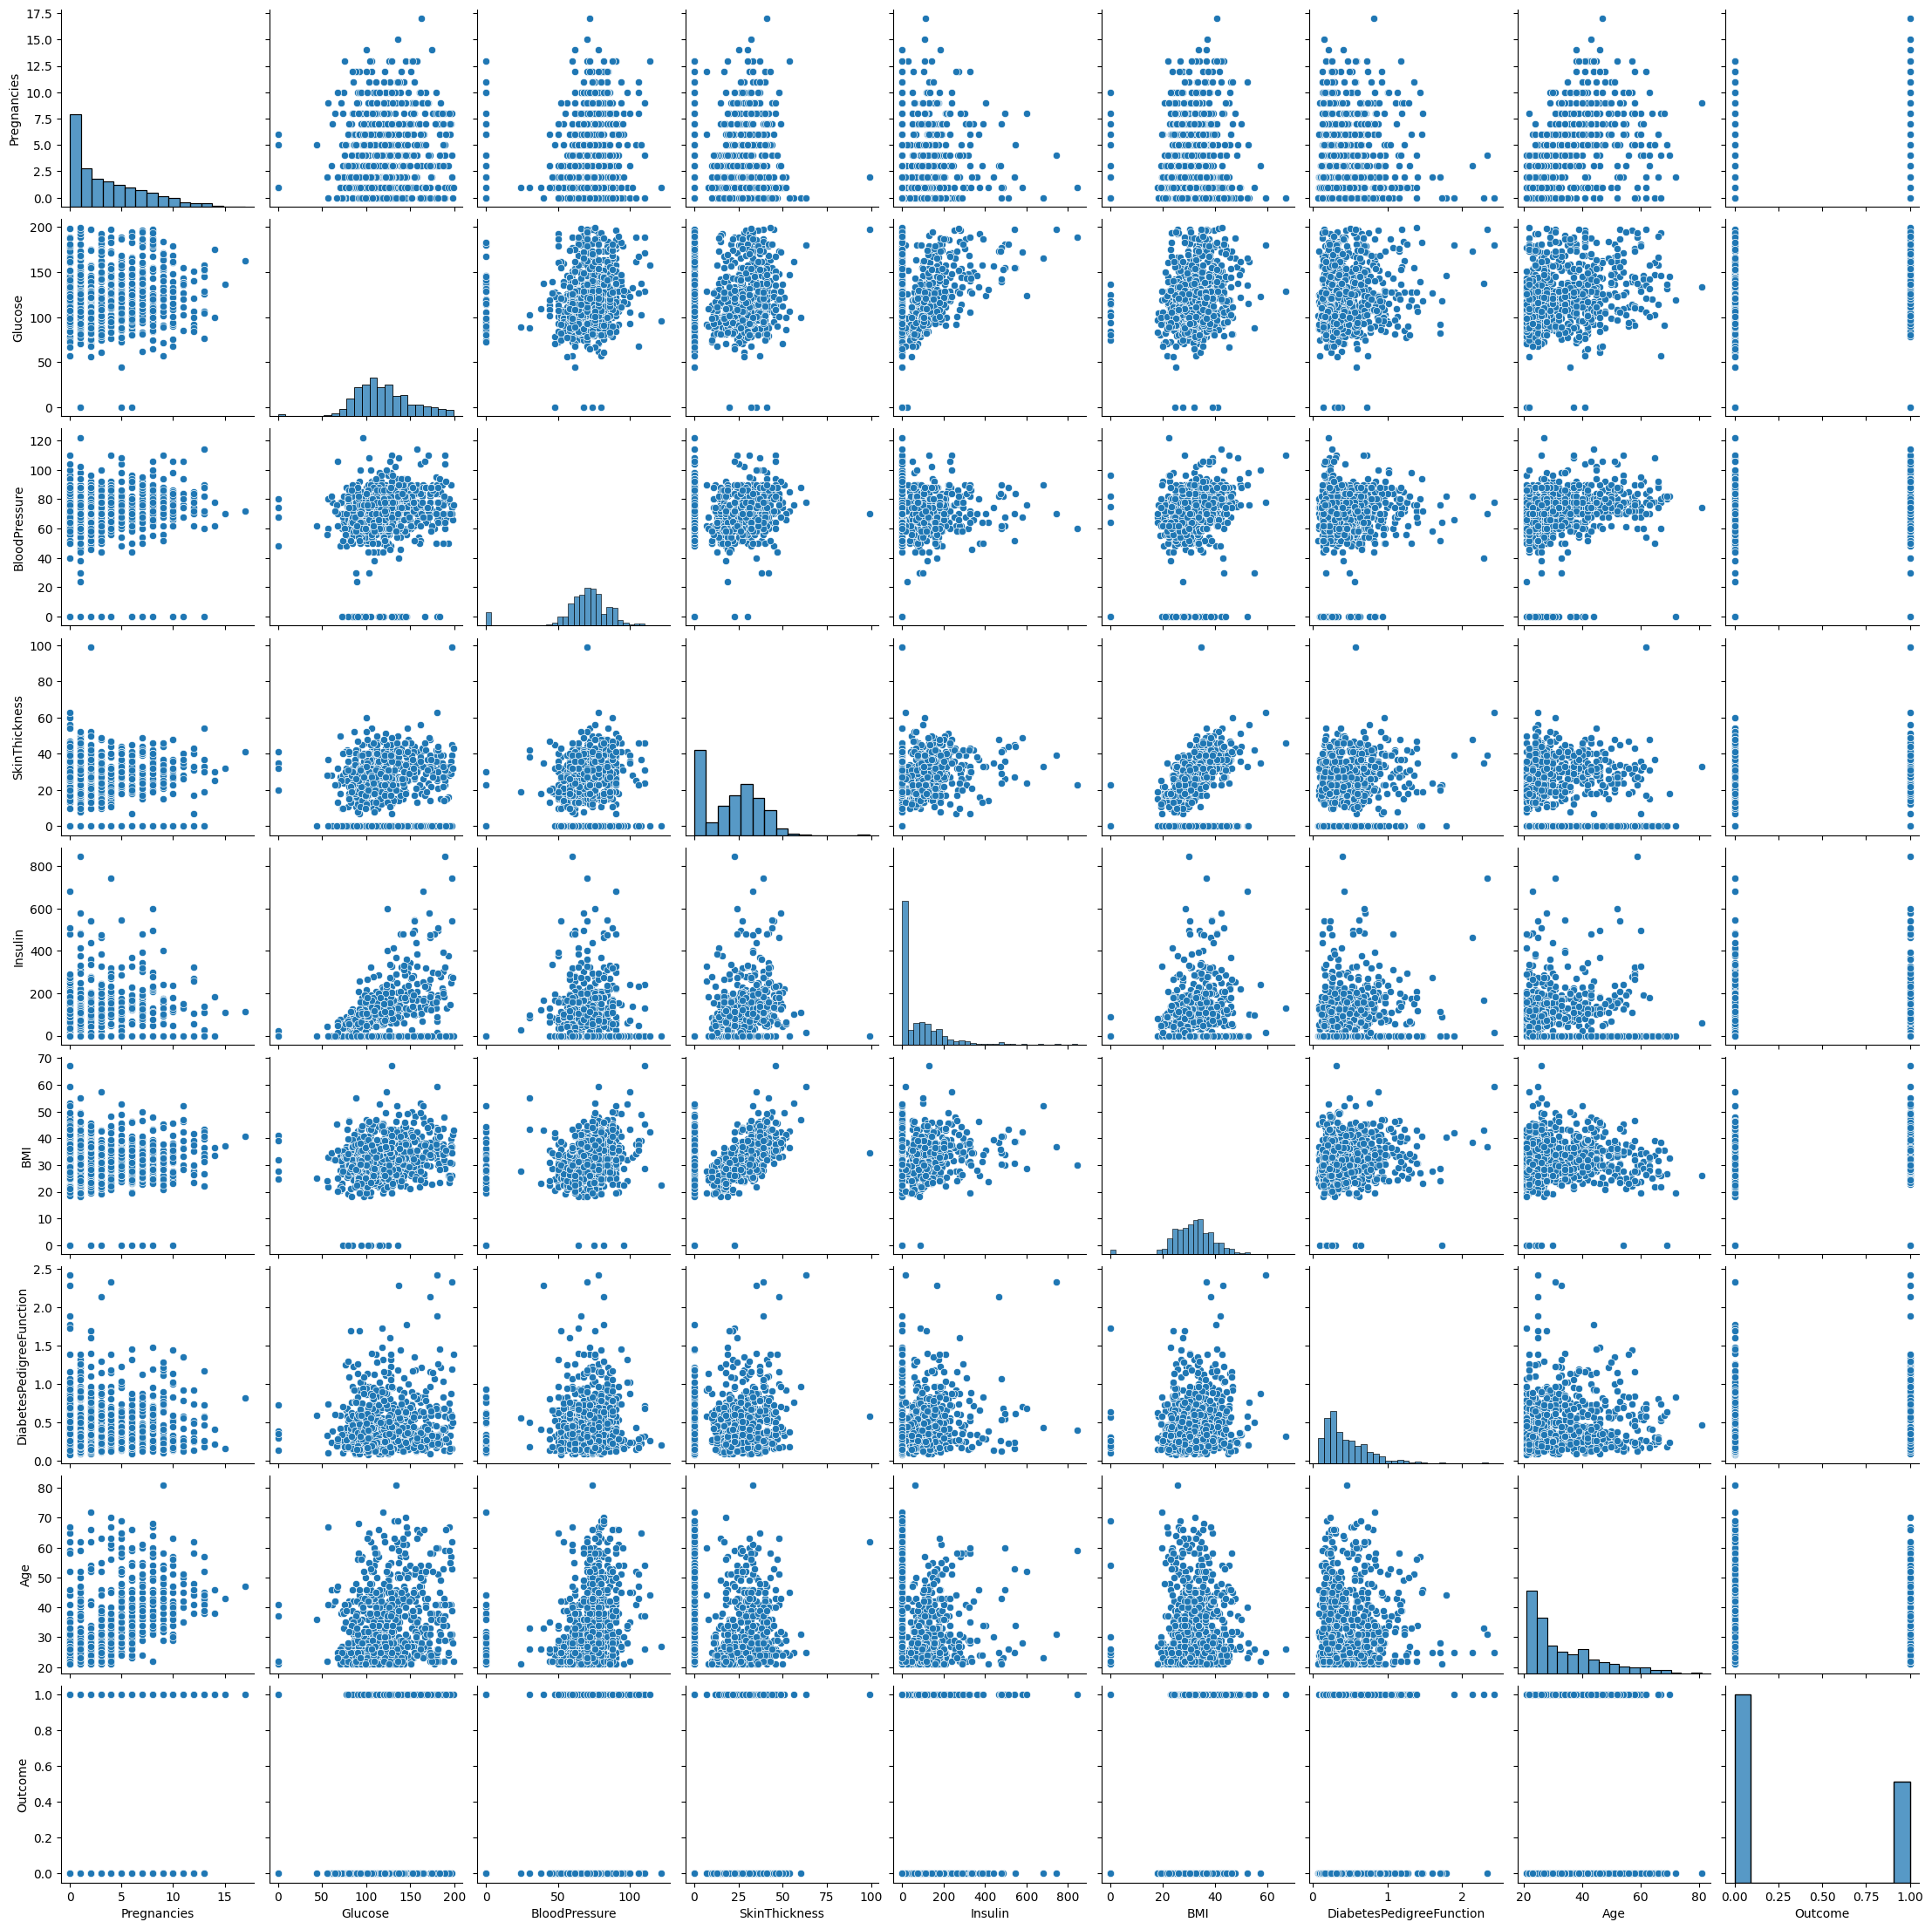

In [18]:
sns.pairplot(data=df)
plt.show()

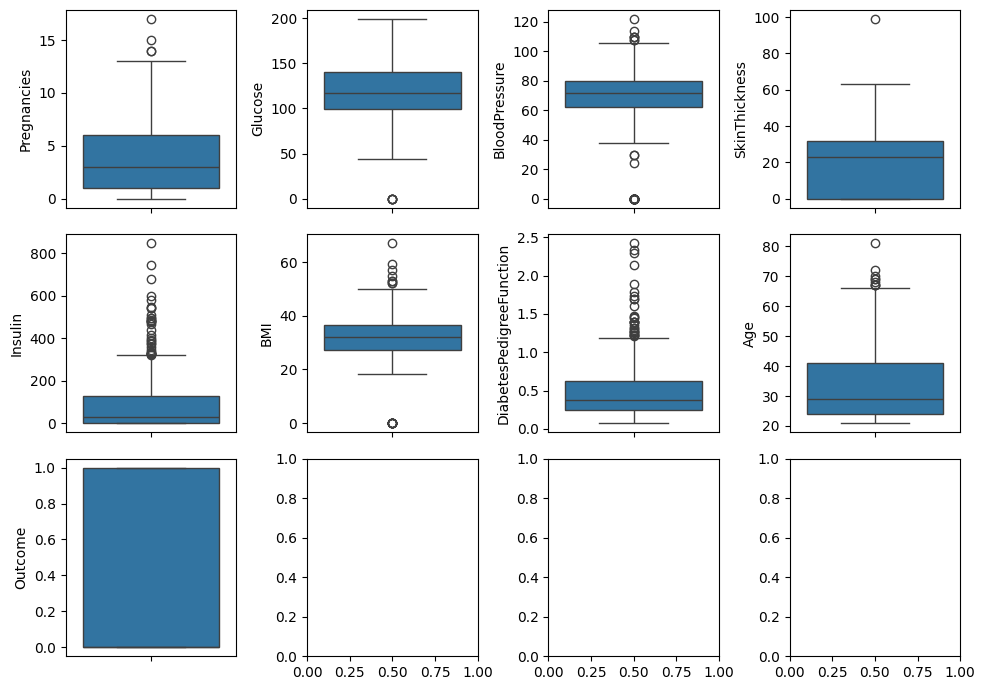

In [19]:
listado_boxplots = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

fig, axis = plt.subplots(3, 4, figsize = (10, 7))

contador =0
for columna in listado_boxplots:
    sns.boxplot(ax = axis[contador//4,contador%4],data=df,y=columna)
    contador +=1

plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

#Modelo sin SkinThickness y sin imputar ceros ya que en el arbol de decisión evidenciamos que asi entregaba el mejor accuracy

X = df.drop(['Outcome','SkinThickness'],axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0.0,0.304,21
618,9,112,82,0,28.2,1.282,50
346,1,139,46,83,28.7,0.654,22
294,0,161,50,0,21.9,0.254,65
231,6,134,80,370,46.2,0.238,46


In [21]:
#Modelo arreglando los ceros de Glucose Bloodpreassure y BMI, pero dejando los ceros de Insulin y sin SkinThickness

X = df2.drop(['Outcome','SkinThickness'],axis=1)
y = df2['Outcome']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)

X_train1.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
338,9,152,78,171,34.2,0.893,33
728,2,175,88,0,22.9,0.326,22
292,2,128,78,182,43.3,1.224,31
690,8,107,80,0,24.6,0.856,34
91,4,123,80,176,32.0,0.443,34


In [22]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train,y_train)

model1 = XGBClassifier(random_state=42) #Modelo arreglando los ceros de Glucose Bloodpreassure y BMI, pero dejando los ceros de Insulin y sin SkinThickness
model1.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [24]:
y_pred1 = model.predict(X_test1)
y_pred1

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7272727272727273

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1,y_pred1)

0.9215686274509803

In [27]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators' : [2,50,100,200]
        }

In [28]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model,params,scoring='accuracy',n_jobs=2)
grid.fit(X_train1,y_train1)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [2, 50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [29]:
best_model = grid.best_estimator_

print(f'los mejores parametros son: {grid.best_params_}')
print(f'el mejor accuracy es de: {grid.best_score_}')

los mejores parametros son: {'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
el mejor accuracy es de: 0.7803278688524589


In [32]:
model1.save_model('../models/Xgboost_default_ceros_ajustados_Glucose_BP_Insulin_default_sin_SkinThickness.json')

In [ ]:
#Se concluye que el mejor modelo es el que tiene ceros imputados para Glucose, BMI, BloodPressure, deja inalterado insulin y suprime SkinThickness
#Se alcanza un accuracy de 0.9215686274509803